In [1]:
import os, sys, time
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import pandas as pd
pd.options.mode.chained_assignment = None
import h5py

%matplotlib inline

from IPython.display import display, HTML

if (sys.version_info < (3, 0)):
    HTML('''<script>
    code_show=true; 
    function code_toggle() {
     if (code_show){
     $('div.input').hide();
     } else {
     $('div.input').show();
     }
     code_show = !code_show
    } 
    $( document ).ready(code_toggle);
    </script>
    <form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

pd.options.display.max_rows = None

In [2]:
# Create timestamp to show when this summary was run
print('Summary run: ' + time.strftime("%a, %d %b %Y %H:%M:%S"))

Summary run: Thu, 20 Apr 2023 04:22:10


In [3]:
pd.options.display.float_format = '{:0,.0f}'.format

In [4]:
geog = 'city'
geog_col = 'hh_city'

# City
Results based on household location


# Population

In [5]:
df = pd.read_csv(r'..\..\..\outputs\agg\dash\person_geog.csv')
_df_pop = df.groupby(geog_col).sum()[['psexpfac']]

df = pd.read_csv(r'..\..\..\outputs\agg\dash\hh_geog.csv')
_df_hh = df.groupby(geog_col).sum()[['hhexpfac']]

df = _df_hh.merge(_df_pop, on=geog_col)
df.rename(columns={'hhexpfac': 'Households', 'psexpfac': 'Persons'}, inplace=True)
df.to_csv(os.path.join(os.getcwd(), r'..\..\..\outputs\compare',geog,'1_population.csv'))
df.loc['Total'] = df.sum(axis=0)
df

,Households,Persons
hh_city,,
Algona,985,"3,147"
Arlington,"7,113","19,189"
Arlington UGA,167,484
Auburn,"29,386","80,155"
Auburn PAA,128,422
Bainbridge Island,"9,944","24,107"
Bear Creek UPD,"3,985","10,412"
Beaux Arts,108,322
Bellevue,"58,021","141,188"


# Employment

In [6]:
df = pd.read_csv(r'..\..\..\outputs\agg\dash\person_geog.csv')
df = df[df['pwtyp'].isin(['Paid Full-Time Worker', 'Paid Part-Time Worker'])]
_df = df.pivot_table(index=geog_col, columns='pwtyp', aggfunc='sum', values='psexpfac')
_df.to_csv(os.path.join(os.getcwd(), r'..\..\..\outputs\compare',geog,'2_employment.csv'))
_df.loc['Total'] = _df.sum(axis=0)
_df['Total'] = _df.sum(axis=1)
_df

pwtyp,Paid Full-Time Worker,Paid Part-Time Worker,Total
hh_city,,,
Algona,"1,215",318,"1,533"
Arlington,"7,074","1,908","8,982"
Arlington UGA,163,51,214
Auburn,"29,693","6,695","36,388"
Auburn PAA,151,34,185
Bainbridge Island,"7,615","2,233","9,848"
Bear Creek UPD,"3,409",652,"4,061"
Beaux Arts,115,19,134
Bellevue,"59,288","10,645","69,933"



### Transit Ridership

#### Total trips

In [7]:
# Region
# By Agency

# Transit Trips from Daysim, by location
df = pd.read_csv(r'..\..\..\outputs\agg\dash\mode_share_'+geog+'.csv')
_df = df[df['mode']=='Transit'].groupby(geog_col).sum()[['trexpfac']]
_df.to_csv(os.path.join(os.getcwd(), r'..\..\..\outputs\compare',geog,'3_transit_trips.csv'))
_df.loc['Total'] = _df.sum(axis=0)
_df

,trexpfac
hh_city,
Algona,464
Arlington,435
Arlington UGA,11
Auburn,"11,504"
Auburn PAA,39
Bainbridge Island,"10,921"
Bear Creek UPD,559
Beaux Arts,52
Bellevue,"19,835"


#### % Commute Trips by Transit (Home to Work direct)

In [8]:
# Mode share
df = df[df['dpurp'] == 'Work']
_df = df.pivot_table(index=[geog_col, 'mode'], aggfunc='sum', values='trexpfac').reset_index()
_df_tot = _df.groupby(geog_col).sum()[['trexpfac']]
_df = _df.merge(_df_tot, how='left', on=geog_col)
_df['mode_share'] = _df['trexpfac_x']/_df['trexpfac_y']

_df = _df[_df['mode'] == 'Transit'][[geog_col,'mode_share']]
pd.options.display.float_format = '{:0,.1%}'.format
_df.to_csv(os.path.join(os.getcwd(), r'..\..\..\outputs\compare',geog,'4_transit_commute_share.csv'))
_df

,hh_city,mode_share
5,Algona,9.3%
13,Arlington,1.7%
20,Arlington UGA,2.3%
27,Auburn,10.2%
34,Auburn PAA,6.9%
41,Bainbridge Island,33.1%
48,Bear Creek UPD,4.3%
54,Beaux Arts,5.2%
62,Bellevue,6.0%
71,Black Diamond,3.3%


## VMT

,VMT,% of VMT
hh_city,,
Algona,"60,777",0.1%
Arlington,"345,145",0.5%
Arlington UGA,"8,776",0.0%
Auburn,"1,447,935",2.1%
Auburn PAA,"7,066",0.0%
Bainbridge Island,"240,683",0.3%
Bear Creek UPD,"255,452",0.4%
Beaux Arts,"4,742",0.0%
Bellevue,"1,953,902",2.8%


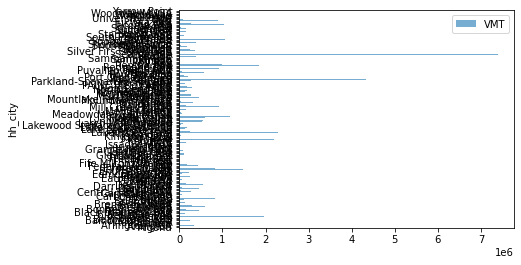

In [9]:
pd.options.display.float_format = '{:0,.0f}'.format
# aggfunc sum trips filtered by dorp==1 and auto modes | groupby hh_rg_proposed
# hh_rg_proposed, 
df = pd.read_csv(r'..\..\..\outputs\agg\dash\person_vmt.csv')
df = df[(df['dorp'] == 1) & (df['mode'].isin(['SOV','HOV2','HOV3+']))]
_df = df.groupby(geog_col).sum()[['travdist_wt']]
_df['% of VMT'] = (_df/_df.sum()).astype('float')
_df.rename(columns={'travdist_wt': 'VMT'}, inplace=True)
_df.to_csv(os.path.join(os.getcwd(), r'..\..\..\outputs\compare',geog,'5_vmt.csv'))
_df[['VMT']].plot(kind='barh', alpha=0.6)
_df.loc['Total'] = _df.sum(axis=0)
_df['% of VMT'] = _df['% of VMT'].apply('{:0,.1%}'.format)
_df

,VHT,% of VHT
hh_city,,
Algona,"2,238",0.1%
Arlington,"11,773",0.4%
Arlington UGA,301,0.0%
Auburn,"57,009",2.0%
Auburn PAA,280,0.0%
Bainbridge Island,"11,003",0.4%
Bear Creek UPD,"9,595",0.3%
Beaux Arts,200,0.0%
Bellevue,"84,217",3.0%


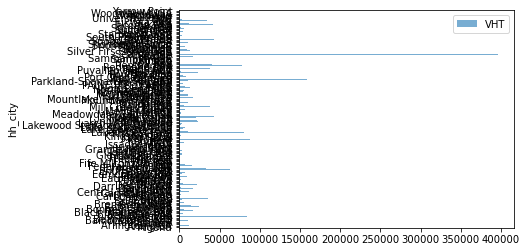

In [10]:
pd.options.display.float_format = '{:0,.0f}'.format
# aggfunc sum trips filtered by dorp==1 and auto modes | groupby hh_rg_proposed
# hh_rg_proposed, 
df = pd.read_csv(r'..\..\..\outputs\agg\dash\person_vht.csv')
df = df[(df['dorp'] == 1) & (df['mode'].isin(['SOV','HOV2','HOV3+']))]
_df = df.groupby(geog_col).sum()[['travtime_wt']]/60.0
_df['% of VHT'] = (_df/_df.sum()).astype('float')
_df.rename(columns={'travtime_wt': 'VHT'}, inplace=True)
_df[['VHT']].plot(kind='barh', alpha=0.6)
_df.loc['Total'] = _df.sum(axis=0)
_df['% of VHT'] = _df['% of VHT'].apply('{:0,.1%}'.format)
_df.to_csv(os.path.join(os.getcwd(), r'..\..\..\outputs\compare',geog,'6_vht.csv'))
_df

## Delay
Calculated based on Household Location

In [11]:
# might need to be calculated individually?
# create a delay summary from total vmt and total sov_ff_time

In [12]:
df = pd.read_csv(r'..\..\..\outputs\agg\dash\trip_time_total.csv')
df = df.groupby(geog_col).sum()[['travtime_wt']]

df2 = pd.read_csv(r'..\..\..\outputs\agg\dash\trip_sov_ff_time.csv')
df2 = df2.groupby(geog_col).sum()[['sov_ff_time_wt']]
df = df2.merge(df, on=geog_col)

# Hours of delay from travel time (in min)
df['Total Delay Hours'] = (df['travtime_wt'] - df['sov_ff_time_wt'])/60

pd.options.display.float_format = '{:0,.0f}'.format
# Hours of delay for households in these locations
df[['Total Delay Hours']]

_df

,VHT,% of VHT
hh_city,,
Algona,"2,238",0.1%
Arlington,"11,773",0.4%
Arlington UGA,301,0.0%
Auburn,"57,009",2.0%
Auburn PAA,280,0.0%
Bainbridge Island,"11,003",0.4%
Bear Creek UPD,"9,595",0.3%
Beaux Arts,200,0.0%
Bellevue,"84,217",3.0%


#### Average Delay Minutes per Household (per Weekday)

In [13]:
# Average minutes of delay per household
pd.options.display.float_format = '{:0,.1f}'.format
_df = _df_hh.merge(df[['Total Delay Hours']], left_index=True, right_index=True)
df['Avg. Minutes of Delay per Household'] = df['Total Delay Hours']/_df['hhexpfac']*60
df.to_csv(os.path.join(os.getcwd(), r'..\..\..\outputs\compare',geog,'7_delay.csv'))

df[['Avg. Minutes of Delay per Household']]

,Avg. Minutes of Delay per Household
hh_city,
Algona,16.7
Arlington,10.8
Arlington UGA,12.4
Auburn,14.7
Auburn PAA,16.8
Bainbridge Island,3.3
Bear Creek UPD,23.4
Beaux Arts,16.5
Bellevue,11.8
